In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
import warnings

In [142]:
adani = pd.read_csv("labels.csv")
label_open_close = pd.read_csv("open label.csv")

In [143]:
adani_21 = adani[adani['Year'] == 2021]
adani_22 = adani[adani['Year'] == 2022]

In [144]:
adani_21_details = label_open_close[label_open_close['Year'] == 2021]
adani_22_details = label_open_close[label_open_close['Year'] == 2022].copy()

In [358]:
X = adani_21_details.drop(['Close','Date','Weekday'],axis=1)
Y = adani_21_details['Close']
Y = pd.DataFrame(Y)
X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)

In [359]:
def deg(value):
    global X
    coll = []
    for i in range(value,len(X)-1):
        train_x = X[i-value:i]
        train_y = Y[i-value:i]
        model = LinearRegression()
        model.fit(train_x,train_y)
        test_x = X[i+1:i+2]
        test_y = Y[i+1:i+2]
        predicted = model.predict(test_x)
        coll.append(predicted[0])
    random = Y[:value+1]
    ran = X[:value+1]
    coll = pd.DataFrame(coll)
    colys = ['Close']
    coll.columns = colys
    com = pd.concat([random,coll],axis=0)
    X = X.reset_index(drop=True)  
    com = com.reset_index(drop=True)  
    com = pd.concat([X,com],axis=1)
    return com

# Q1

In [147]:
end = []
l = []
a = 0
adani_21_details = adani_21_details.reset_index(drop=True)
for i in range(5,31):
    table = deg(i)
    table = table.reset_index(drop=True)
    for i in range(0,len(adani_21_details)):
        s = table.loc[i,'Close'] - adani_21_details.loc[i,'Close']
        l.append(s)
    ttl = sum(l)
    ttl = ttl/len(adani_21_details)
    end.append(ttl)

Text(0.5, 1.0, 'Adani Year 2021')

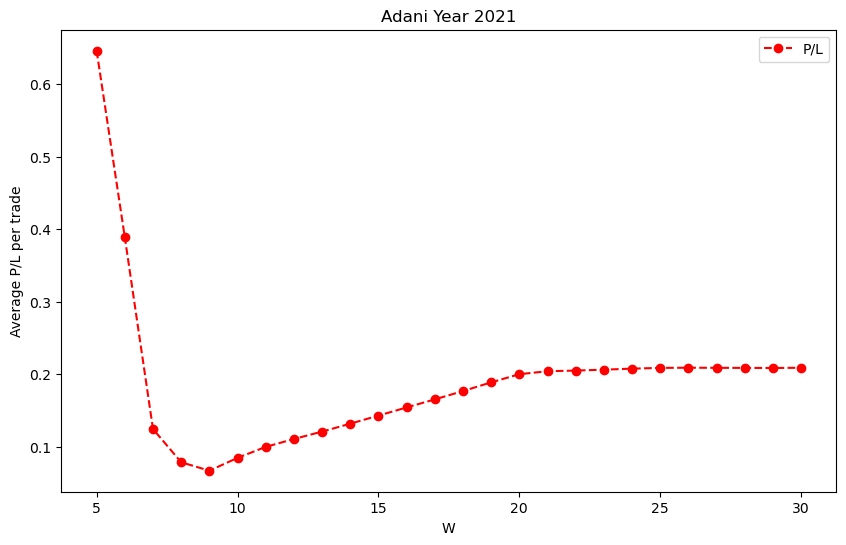

In [148]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(5,31),end,marker = 'o', linestyle = '--', color = 'r', label = 'P/L')
plt.legend(loc = 'best')
plt.xlabel('W')
plt.ylabel('Average P/L per trade')
plt.title('Adani Year 2021')

Optimal value for W = 5 as the average profit loss is the highest

In [361]:
w_5_2021 = deg(5)

In [346]:
X = adani_22_details.drop(['Close','Date','Weekday'],axis=1)
Y = adani_22_details['Close']
Y = pd.DataFrame(Y)
X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)

In [347]:
def deg(value):
    global X
    coll = []
    for i in range(value,len(X)-1):
        train_x = X[i-value:i]
        train_y = Y[i-value:i]
        model = LinearRegression()
        model.fit(train_x,train_y)
        test_x = X[i+1:i+2]
        test_y = Y[i+1:i+2]
        predicted = model.predict(test_x)
        coll.append(predicted[0])
    random = Y[:value+1]
    ran = X[:value+1]
    coll = pd.DataFrame(coll)
    colys = ['Close']
    coll.columns = colys
    com = pd.concat([random,coll],axis=0)
    X = X.reset_index(drop=True)  
    com = com.reset_index(drop=True)  
    com = pd.concat([X,com],axis=1)
    return com

In [348]:
w_5 = deg(5)

# Q2

In [349]:
def calculate_r2_scores(data, window_size):
    r2_scores = []

    for i in range(window_size, len(data)):
        train_data = data.iloc[i - window_size:i].copy()  # Use .copy() to prevent warnings

        train_data['Date'] = pd.to_datetime(train_data['Date'])
        test_data = data.iloc[i:i + 3].copy()  # Take 3 elements for the test window
        test_data['Date'] = pd.to_datetime(test_data['Date'])

        reference_date = train_data['Date'].min()
        train_data['Date'] = (train_data['Date'] - reference_date).dt.days
        test_data['Date'] = (test_data['Date'] - reference_date).dt.days

        model = LinearRegression()
        model.fit(train_data[['Date']], train_data['Close'])

        predicted_close = model.predict(test_data[['Date']])

        if len(train_data) > 1:
            r2 = r2_score(test_data['Close'], predicted_close)
            r2_scores.append(abs(r2))
        else:
            pass

    return r2_scores

In [350]:
a = calculate_r2_scores(adani_22_details,5)

C:\Users\gritv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [351]:
avg_a_r2 = round(np.nanmean(a),2)
avg_a_r2

147.87

<Figure size 1000x1000 with 0 Axes>

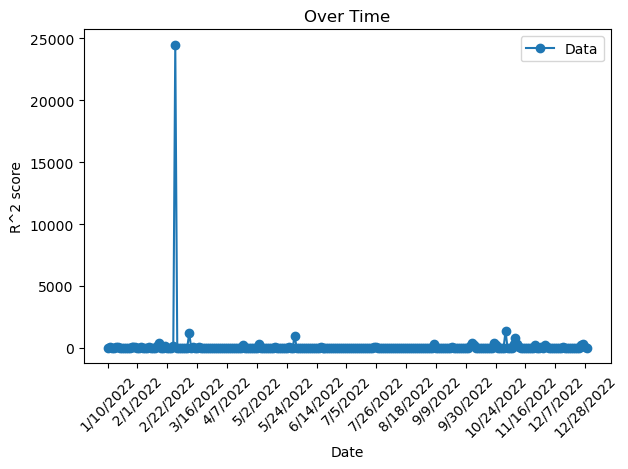

In [352]:
plt.figure(figsize=(10,10))
dates = adani_22_details['Date'].iloc[5:]
fig, ax = plt.subplots()

ax.plot(dates, a, marker='o', linestyle='-', label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('R^2 score')
ax.set_title('Over Time')

date_interval = 15
ax.set_xticks(dates[::date_interval]) 
ax.set_xticklabels(dates[::date_interval], rotation=45)  

plt.legend()
plt.tight_layout()

plt.show()

# Q3

In [353]:
portfolio_value = 100
position = 0
cash = portfolio_value
short_position = 0
long = 0
short = 0
long_profit = 0
short_profit = 0

for i in range(1, len(w_5)):
    current_price = w_5['Close'].iloc[i - 1]
    predicted_price_tomorrow = w_5['Close'].iloc[i]

    if predicted_price_tomorrow < current_price:
        if short_position == 0:
            short += 1
            amount_to_short = cash
            short_position = amount_to_short / current_price
            cash -= amount_to_short
        elif position > 0:
            long += 1
            amount_to_sell = position * current_price
            long_profit += amount_to_sell - amount_to_invest
            cash += amount_to_sell
            position = 0
            short += 1

    elif predicted_price_tomorrow > current_price:
        if position == 0:
            long += 1
            amount_to_invest = cash
            position = amount_to_invest / current_price
            cash -= amount_to_invest
        elif short_position > 0:
            short += 1
            amount_to_cover = short_position * current_price
            short_profit += amount_to_invest - amount_to_cover
            cash += amount_to_cover
            short_position = 0
            long += 1
    else:
        pass

final_portfolio_value = cash + (position * w_5['Close'].iloc[-1]) + (short_position * w_5['Close'].iloc[-1])

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Long Positions: {short}")
print(f"Total Short Positions: {long}")


Final Portfolio Value: $224.61
Total Long Positions: 107
Total Short Positions: 1


# Q4

In [354]:
avg_long =((position * w_5['Close'].iloc[-1]) - 20 )/ final_portfolio_value
round(avg_long,2)

0.91

In [355]:
avg_short = 1- avg_long
round(avg_short,2)

0.09

# Q5

In [356]:
avg_long = short/len(w_5)
round(avg_long,2)

0.43

In [357]:
avg_short = long/len(w_5)
round(avg_short,3)

0.004

# For 2021

In [362]:
portfolio_value = 100
position = 0
cash = portfolio_value
short_position = 0
long = 0
short = 0
long_profit = 0
short_profit = 0

for i in range(1, len(w_5_2021)):
    current_price = w_5_2021['Close'].iloc[i - 1]
    predicted_price_tomorrow = w_5_2021['Close'].iloc[i]

    if predicted_price_tomorrow < current_price:
        if short_position == 0:
            short += 1
            amount_to_short = cash
            short_position = amount_to_short / current_price
            cash -= amount_to_short
        elif position > 0:
            long += 1
            amount_to_sell = position * current_price
            long_profit += amount_to_sell - amount_to_invest
            cash += amount_to_sell
            position = 0
            short += 1

    elif predicted_price_tomorrow > current_price:
        if position == 0:
            long += 1
            amount_to_invest = cash
            position = amount_to_invest / current_price
            cash -= amount_to_invest
        elif short_position > 0:
            short += 1
            amount_to_cover = short_position * current_price
            short_profit += amount_to_invest - amount_to_cover
            cash += amount_to_cover
            short_position = 0
            long += 1
    else:
        pass

final_portfolio_value = cash + (position * w_5_2021['Close'].iloc[-1]) + (short_position * w_5_2021['Close'].iloc[-1])

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Long Positions: {short}")
print(f"Total Short Positions: {long}")


Final Portfolio Value: $347.53
Total Long Positions: 112
Total Short Positions: 1


In [364]:
avg_long =((position * w_5['Close'].iloc[-1]))/ final_portfolio_value
round(avg_long,2)

2.26

# For SPY

In [369]:
spy = pd.read_csv("spy.csv")
label_open_close = pd.read_csv("spy detail.csv")

In [370]:
spy_21 = spy[spy['Year'] == 2021]
spy_22 = spy[spy['Year'] == 2022]

In [371]:
spy_21_details = label_open_close[label_open_close['Year'] == 2021]
spy_22_details = label_open_close[label_open_close['Year'] == 2022].copy()

In [411]:
X = spy_21_details.drop(['Close','Date','Weekday'],axis=1)
Y = spy_21_details['Close']
Y = pd.DataFrame(Y)
X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)

In [412]:
def deg(value):
    global X
    coll = []
    for i in range(value,len(X)-1):
        train_x = X[i-value:i]
        train_y = Y[i-value:i]
        model = LinearRegression()
        model.fit(train_x,train_y)
        test_x = X[i+1:i+2]
        test_y = Y[i+1:i+2]
        predicted = model.predict(test_x)
        coll.append(predicted[0])
    random = Y[:value+1]
    ran = X[:value+1]
    coll = pd.DataFrame(coll)
    colys = ['Close']
    coll.columns = colys
    com = pd.concat([random,coll],axis=0)
    X = X.reset_index(drop=True)  
    com = com.reset_index(drop=True)  
    com = pd.concat([X,com],axis=1)
    return com

In [374]:
end = []
l = []
a = 0
spy_21_details = spy_21_details.reset_index(drop=True)
for i in range(5,31):
    table = deg(i)
    table = table.reset_index(drop=True)
    for i in range(0,len(spy_21_details)):
        s = table.loc[i,'Close'] - spy_21_details.loc[i,'Close']
        l.append(s)
    ttl = sum(l)
    ttl = ttl/len(spy_21_details)
    end.append(ttl)

Text(0.5, 1.0, 'SPY Year 2021')

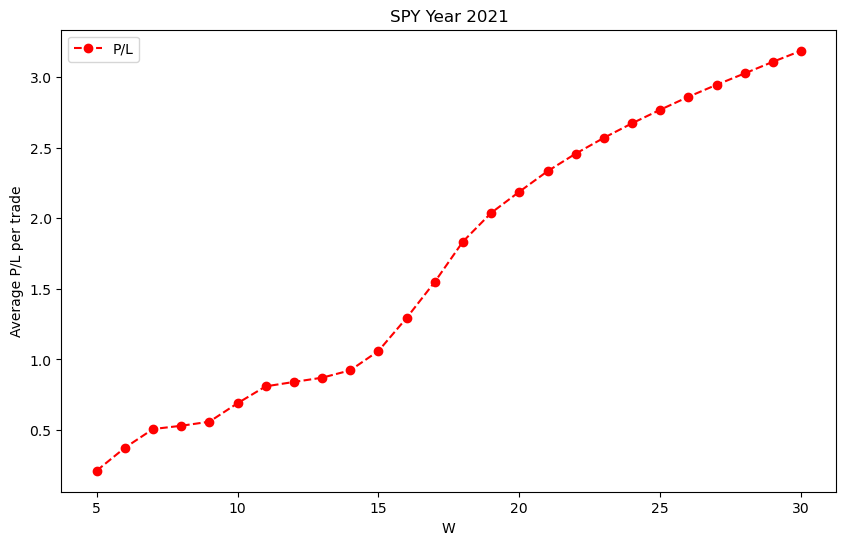

In [375]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(5,31),end,marker = 'o', linestyle = '--', color = 'r', label = 'P/L')
plt.legend(loc = 'best')
plt.xlabel('W')
plt.ylabel('Average P/L per trade')
plt.title('SPY Year 2021')

In [414]:
w_30_2021 = deg(30)

In [415]:
X = spy_22_details.drop(['Close','Date','Weekday'],axis=1)
Y = spy_22_details['Close']
Y = pd.DataFrame(Y)
X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)

In [416]:
def deg(value):
    global X
    coll = []
    for i in range(value,len(X)-1):
        train_x = X[i-value:i]
        train_y = Y[i-value:i]
        model = LinearRegression()
        model.fit(train_x,train_y)
        test_x = X[i+1:i+2]
        test_y = Y[i+1:i+2]
        predicted = model.predict(test_x)
        coll.append(predicted[0])
    random = Y[:value+1]
    ran = X[:value+1]
    coll = pd.DataFrame(coll)
    colys = ['Close']
    coll.columns = colys
    com = pd.concat([random,coll],axis=0)
    X = X.reset_index(drop=True)  
    com = com.reset_index(drop=True)  
    com = pd.concat([X,com],axis=1)
    return com

In [417]:
w_30 = deg(30)

In [418]:
b = calculate_r2_scores(spy_22_details,30)

C:\Users\gritv\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


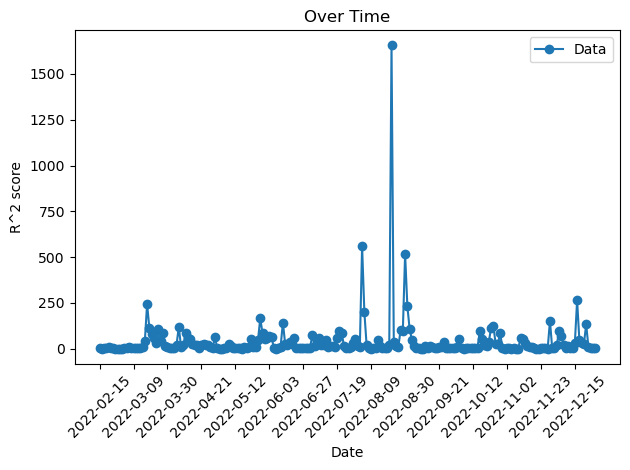

In [419]:
dates = spy_22_details['Date'].iloc[30:]
fig, ax = plt.subplots()

ax.plot(dates, b, marker='o', linestyle='-', label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('R^2 score')
ax.set_title('Over Time')

date_interval = 15
ax.set_xticks(dates[::date_interval]) 
ax.set_xticklabels(dates[::date_interval], rotation=45)  

plt.legend()
plt.tight_layout()

plt.show()

In [420]:
avg = np.nanmean(b)
round(avg,2)

39.57

In [436]:
portfolio_value = 100
position = 0
cash = portfolio_value
short_position = 0
long = 0
short = 0
total_long_earnings = 0 
total_short_earnings = 0  

for i in range(1, len(spy_22_details)):
    current_price = spy_22_details['Close'].iloc[i - 1]
    predicted_price_tomorrow = w_30['Close'].iloc[i]

    if predicted_price_tomorrow < current_price:
        if short_position == 0:
            short += 1
            amount_to_short = cash
            short_position = amount_to_short / current_price
            cash -= amount_to_short
        elif position > 0:
            long += 1
            amount_to_sell = position * current_price
            total_long_earnings += (amount_to_sell - amount_to_invest)
            cash += amount_to_sell
            position = 0
            short += 1
            amount_to_short = cash
            short_position = amount_to_short / current_price
            cash -= amount_to_short

    elif predicted_price_tomorrow > current_price:
        if position == 0:
            long += 1
            amount_to_invest = cash
            position = amount_to_invest / current_price
            cash -= amount_to_invest
        elif short_position > 0:
            short += 1
            amount_to_cover = short_position * current_price
            total_short_earnings += (amount_to_invest - amount_to_cover)
            cash += amount_to_cover
            short_position = 0
            long += 1
            amount_to_invest = cash
            position = amount_to_invest / current_price
            cash -= amount_to_invest

final_portfolio_value = cash + (position * w_30['Close'].iloc[-1]) + (short_position * w_30['Close'].iloc[-1])

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Long Positions: {short}")
print(f"Total Short Positions: {long}")


Final Portfolio Value: $80.00
Total Long Positions: 1
Total Short Positions: 111


In [442]:
avg_p_long = (position * w_30['Close'].iloc[-1]) +10/ final_portfolio_value
round(avg_p_long,4)

0.125

In [448]:
avg_p_short = ((short_position * w_30['Close'].iloc[-1]) - 20)/ final_portfolio_value
round(avg_p_short,4)

0.75

In [439]:
avg_long = short/len(w_30)
round(avg_long,3)

0.004

In [440]:
avg_short = long/len(w_30)
round(avg_short,2)

0.44

# For 2021

In [449]:
portfolio_value = 100
position = 0
cash = portfolio_value
short_position = 0
long = 0
short = 0
total_long_earnings = 0 
total_short_earnings = 0  

for i in range(1, len(spy_21_details)):
    current_price = spy_21_details['Close'].iloc[i - 1]
    predicted_price_tomorrow = w_30_2021['Close'].iloc[i]

    if predicted_price_tomorrow < current_price:
        if short_position == 0:
            short += 1
            amount_to_short = cash
            short_position = amount_to_short / current_price
            cash -= amount_to_short
        elif position > 0:
            long += 1
            amount_to_sell = position * current_price
            total_long_earnings += (amount_to_sell - amount_to_invest)
            cash += amount_to_sell
            position = 0
            short += 1
            amount_to_short = cash
            short_position = amount_to_short / current_price
            cash -= amount_to_short

    elif predicted_price_tomorrow > current_price:
        if position == 0:
            long += 1
            amount_to_invest = cash
            position = amount_to_invest / current_price
            cash -= amount_to_invest
        elif short_position > 0:
            short += 1
            amount_to_cover = short_position * current_price
            total_short_earnings += (amount_to_invest - amount_to_cover)
            cash += amount_to_cover
            short_position = 0
            long += 1
            amount_to_invest = cash
            position = amount_to_invest / current_price
            cash -= amount_to_invest

final_portfolio_value = cash + (position * w_30_2021['Close'].iloc[-1]) + (short_position * w_30_2021['Close'].iloc[-1])

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Long Positions: {short}")
print(f"Total Short Positions: {long}")


Final Portfolio Value: $128.81
Total Long Positions: 103
Total Short Positions: 1
